# **MÓDULO 21 - Projeto de Credit Score - Árvore de Decisão**


No módulo 17, vocês realizaram a primeira etapa do projeto de crédito de vocês. Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste. Já no módulo 14, aplicaram a base já tratada o algoritmo de Naive Bayes, onde avaliaram os resultados das previsões. Nesse módulo aplicaremos a nossa base o algoritmo da árvore de decisão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
X_test = pd.read_csv("teste e treino proj/X_test.csv", delimiter=',')
X_train = pd.read_csv("teste e treino proj/X_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("teste e treino proj/y_test.csv", delimiter=',')
y_train = pd.read_csv("teste e treino proj/y_train_balanced.csv", delimiter=',')

In [4]:
X_test

,Age,Income,Number of Children,Genero_encoded,Status_civil_encoded,Home_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,25.000000,55000.0,0,0,1,1,True,False,False,False
1,48.000000,87500.0,1,0,0,0,False,True,False,False
2,26.000000,55000.0,1,0,0,0,True,False,False,False
3,39.000000,62500.0,2,0,0,0,True,False,False,False
4,35.000000,90000.0,1,0,0,0,False,True,False,False
5,25.000000,55000.0,0,0,1,1,True,False,False,False
6,48.000000,82500.0,1,0,0,0,False,True,False,False
7,48.000000,82500.0,1,0,0,0,False,True,False,False
8,36.000000,95000.0,2,0,0,0,False,False,False,True
9,37.409091,95000.0,1,0,0,0,False,False,True,False


In [5]:
X_train

,Age,Income,Number of Children,Genero_encoded,Status_civil_encoded,Home_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,26.000000,45000.000000,0,0,1,1,False,False,False,False
1,29.000000,27500.000000,0,0,1,1,False,False,True,False
2,25.000000,62500.000000,0,0,1,1,True,False,False,False
3,29.000000,68000.000000,2,0,0,0,False,True,False,False
4,31.000000,65000.000000,0,1,1,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
247,29.950365,43703.466973,0,0,1,1,False,False,False,False
248,34.000000,47500.000000,0,1,1,1,False,False,False,False
249,29.426307,57500.000000,0,0,1,1,True,False,False,False
250,25.000000,60063.547817,0,0,1,1,True,False,False,False


In [6]:
y_test

,Credit Score
0,1
1,2
2,1
3,2
4,2
5,1
6,2
7,2
8,2
9,2


In [7]:
y_train

,Credit Score
0,1
1,0
2,1
3,1
4,1
...,...
247,1
248,1
249,1
250,1


Tudo certo, no enunciado diz para verificar se está balanceado no teste, mas acredito ser um erro pois o que balanceamos é o treino apenas.

# 2) Explique com suas palavras, qual o passo a passo para a aplicação do algoritmo da árvore de decisão, não esqueça de citar a etapa de avaliação do modelo e também como podemos melhorar nosso modelo.

Primeiro checamos os dados do banco, como estão dispostos, possíveis variáveis que possam ser úteis em seguida para as análises univariada e bivariada. Nessas análises entendemos quais as variáveis tem correlação e se elas têm causalidade. Após começamos o tratamento dos dados, ajustando para o ML logo em seguida. Tratamos valores nulos e outliers (seja por substituição, seja por drop). Após, fizemos o ajuste dos labels, para que variáveis categóricas possam ser analisadas pelo modelo, com tudo pronto, começamos a parte de criação dos modelos onde foi notado que existia um problema de balanceamento, qual foi tratado com SOTE. Então as bases teste e treino foram criadas. Então o modelo é criado, junto com parâmetros de avaliação (precision, recall, accuracy, F1) é possível avaliar o desempenho do modelo, e tomar decisões de onde ele é melhor aplicado, ou ainda se é necessário algum "fine tuning" para chegar nos resultados desejados. Um exemplo seria a "poda", que consiste em diminuir a profundidade da árvore, reduzindo a complexidade. É possível também avaliar as variáveis com maior peso e criar uma nova árvore com apenas essas variáveis selecionadas, o que pode melhorar (ou não) o resultado.

# 3) Aplique o algortimo da árvore de decisão aos dados de treinamento, utilizando critério de Gini e random state = 0.
Traga a acurácia para o modedlo com os dados de treino.

In [10]:
arvore_score = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_score.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [17]:
predict = arvore_score.predict(X_train)
acu = accuracy_score(y_train, predict)
print('Acurácia:', acu)

Acurácia: 1.0


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [18]:
predict = arvore_score.predict(X_test)
acu = accuracy_score(y_test, predict)
print('Acurácia:', acu)

Acurácia: 0.975609756097561


In [19]:
relatorio = classification_report(y_test, predict)
print('Relatório:')
print(relatorio)

Relatório:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      1.00      0.92         6
           2       1.00      0.97      0.98        29

    accuracy                           0.98        41
   macro avg       0.95      0.99      0.97        41
weighted avg       0.98      0.98      0.98        41



Tanto teste como treino tem um desempenho alto (acima de 95%). A única métrica que baixou o score geral é precisão de 1 (score médio), ainda temos 86%, mas abaixo dos outros que estão 95%+.

# 5) Plote a árvore de decisão.
É possível fazer uma avaliação visual? Qual a profundidade da árvore?

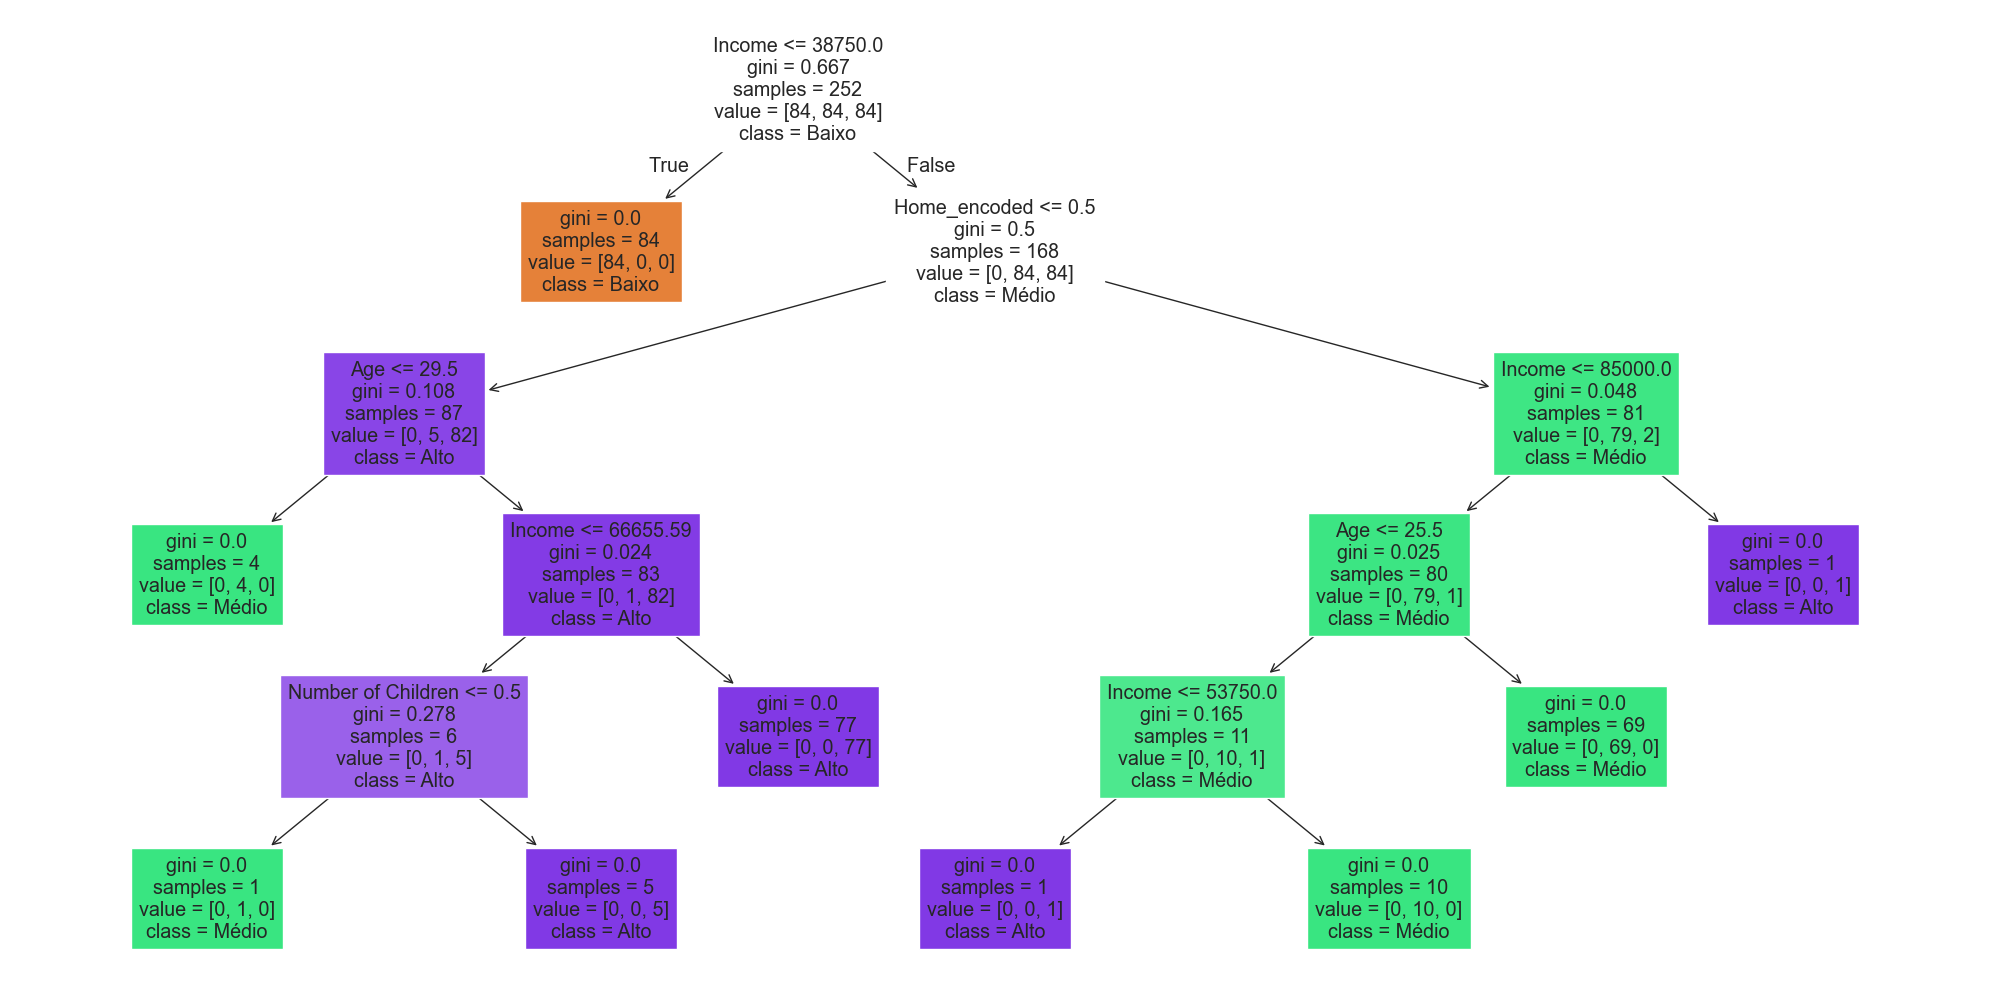

In [22]:
sns.set_style('whitegrid')

plt.figure(figsize=(20,10))
plot_tree(arvore_score, filled=True, feature_names=X_test.columns, class_names=['Baixo', 'Médio', 'Alto'])
plt.tight_layout()
plt.show()

# 6) Identifique as 2 principais features do modelo.


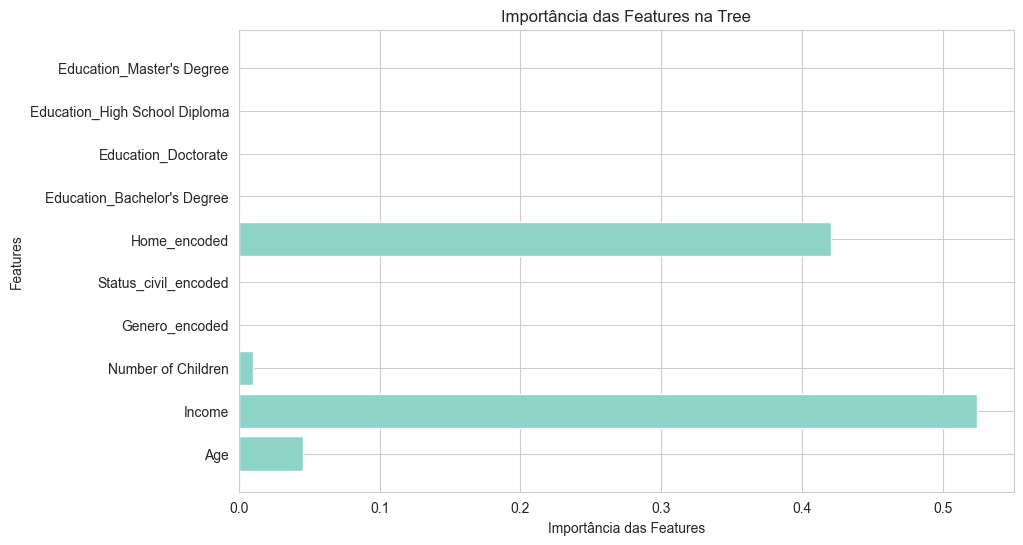

In [24]:
importancia_features = arvore_score.feature_importances_
nome_features = X_test.columns

plt.figure(figsize=(10,6))
plt.barh(nome_features, importancia_features)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features na Tree')
plt.show()

Receita e ter casa é o que mais importa.

# 7) Rode um modelo de árvore de decisão apenas com as 2 principais features encontradas. E avalie os resultados. Para você o desempenho da árvore está melhor que o modelo anterior? Justifique.

In [25]:
X_train_reduzido = X_train[['Income', 'Home_encoded']]
X_test_reduzido = X_test[['Income', 'Home_encoded']]

In [29]:
arvore_score_reduzido = DecisionTreeClassifier(criterion='gini', random_state=0)
arvore_score_reduzido.fit(X_train_reduzido, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [30]:
predict_reduzido = arvore_score_reduzido.predict(X_test_reduzido)

In [31]:
relatorio = classification_report(y_test, predict_reduzido)
print('Relatório:')
print(relatorio)

Relatório:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.83      0.83      0.83         6
           2       0.97      0.97      0.97        29

    accuracy                           0.95        41
   macro avg       0.93      0.93      0.93        41
weighted avg       0.95      0.95      0.95        41



Os valores diminuíram um pouco no geral, o que indica que ainda que pouco as variáveis retiradas eram úteis para um modelo mais preciso.

# 8) Compare os resultados obtidos com a árvore de decisão com os resultados do Naive Bayes (Exercício módulo 20). Qual parece ter se adequado melhor aos dados e tem melhores resultados de avaliação? Justifique.

Ambos conseguiram acertar 100% em algumas métricas, indica que ambos tiveram boa adaptabilidade. Como temos uma base de dados mais enxuta e uma quantidade menor de variáveis, o modelo Naive pode ser mais simples para usar. Se formos falar de resultado absoluto, Naive está com 100%, árvore está com 99% em accuracy e em recall é 100% para 98%. Por esse motivo eu ficaria com Naive.